# Heart Disease Prediction and Clustering Analysis

## Project Introduction

This notebook explores the Heart Disease dataset to predict the presence of heart disease and to identify potential clusters within the data. The project aims to build and evaluate various classification models for accurate prediction and to utilize clustering techniques for discovering underlying patterns in patient data.

## Dataset Description

The dataset contains information related to heart disease patients, including demographic details, medical measurements, and the presence of heart disease.

## Approach

The analysis follows these steps:
1. **Exploratory Data Analysis (EDA):** Understand the structure and characteristics of the data, including distributions and relationships between features.
2. **Data Preprocessing:** Clean the data, handle missing values and outliers, encode categorical variables, and scale numerical features.
3. **Dimension Reduction:** Apply Principal Component Analysis (PCA) to reduce the dimensionality of the data while retaining most of the variance.
4. **Supervised Learning (Classification):** Train and evaluate several classification models to predict heart disease.
5. **Unsupervised Learning (Clustering):** Apply K-Means and Hierarchical Clustering to find natural groupings within the patient data.

# Importing Libraries and Setting Up Environment

In [120]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix, classification_report, roc_curve, auc, silhouette_score

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
np.random.seed(42)

In [121]:
heart_disease_df = pd.read_csv('heart_disease.csv')

Exploratory Data Analysis (EDA) is a critical initial step to understand the dataset's characteristics. This section involves inspecting the data's structure, identifying missing values and outliers, and visualizing relationships between features. The goal is to gain insights that will inform subsequent data preprocessing and modeling steps.

# Exploratory Data Analysis (EDA)

In [122]:
heart_disease_df.shape

(920, 16)

In [123]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [124]:
print(heart_disease_df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [125]:
heart_disease_df.describe().round(2)

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.00,920.00,861.00,890.00,865.00,858.00,309.00,920.00
mean,460.50,53.51,132.13,199.13,137.55,0.88,0.68,1.00
std,265.73,9.42,19.07,110.78,25.93,1.09,0.94,1.14
min,1.00,28.00,0.00,0.00,60.00,-2.60,0.00,0.00
25%,230.75,47.00,120.00,175.00,120.00,0.00,0.00,0.00
50%,460.50,54.00,130.00,223.00,140.00,0.50,0.00,1.00
75%,690.25,60.00,140.00,268.00,157.00,1.50,1.00,2.00
max,920.00,77.00,200.00,603.00,202.00,6.20,3.00,4.00


In [126]:
# ### Handling Missing Values
#
# Missing values are handled based on the nature of the data:
# - Rows with missing values in both 'thal' and 'slope' are dropped as they constitute a significant portion of missing data in these columns.
# - Missing values in numerical columns ('trestbps', 'chol', 'thalch', 'oldpeak') are filled with the mean of their respective columns.
# - Missing values in 'ca' are filled with the median.
# - Missing values in categorical columns ('fbs', 'restecg', 'exang', 'slope', 'thal') are filled with the mode.

# ### Checking for Missing Values After Imputation
#
# Verify that all missing values have been successfully handled.

# ### Removing Outliers
#
# Outliers in numerical columns ('age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca') are identified and removed using the Interquartile Range (IQR) method to ensure the data is within a reasonable range.


## Data Quality Checks

In [127]:
# Checking for missing values in each column is crucial for data cleaning.
# The `isna().sum()` method helps identify the number of missing entries per column.

heart_disease_df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [128]:
# Dropping Unnecessary Columns and Transforming Target Variable
heart_disease_df.drop(heart_disease_df[['id', 'dataset']], axis=1, inplace=True)
heart_disease_df['num'] = heart_disease_df['num'].apply(lambda x: 1 if x > 0 else 0)

In [129]:
# Columns that are not relevant for the analysis, such as 'id' and 'dataset', are dropped.
# The target variable 'num' is transformed into a binary variable (0 or 1) indicating the absence or presence of heart disease.

heart_disease_df.drop(heart_disease_df[heart_disease_df['thal'].isnull() & heart_disease_df['slope'].isnull()].index, inplace=True)

mean_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
heart_disease_df[mean_cols] = heart_disease_df[mean_cols].fillna(heart_disease_df[mean_cols].mean())

heart_disease_df['ca'].fillna(heart_disease_df['ca'].median(), inplace=True)

mode_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in mode_cols:
    heart_disease_df[col].fillna(heart_disease_df[col].mode().iloc[0], inplace=True)

In [130]:
heart_disease_df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [131]:
outlier_clos = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
outlier = pd.Series(False, index=heart_disease_df.index)

for col in outlier_clos:
    Q1 = heart_disease_df[col].quantile(0.25)
    Q3 = heart_disease_df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    mask = ((heart_disease_df[col] > upper) | (heart_disease_df[col] < lower))
    outlier |= mask

heart_disease_df = heart_disease_df[~outlier]

## Data Visualization

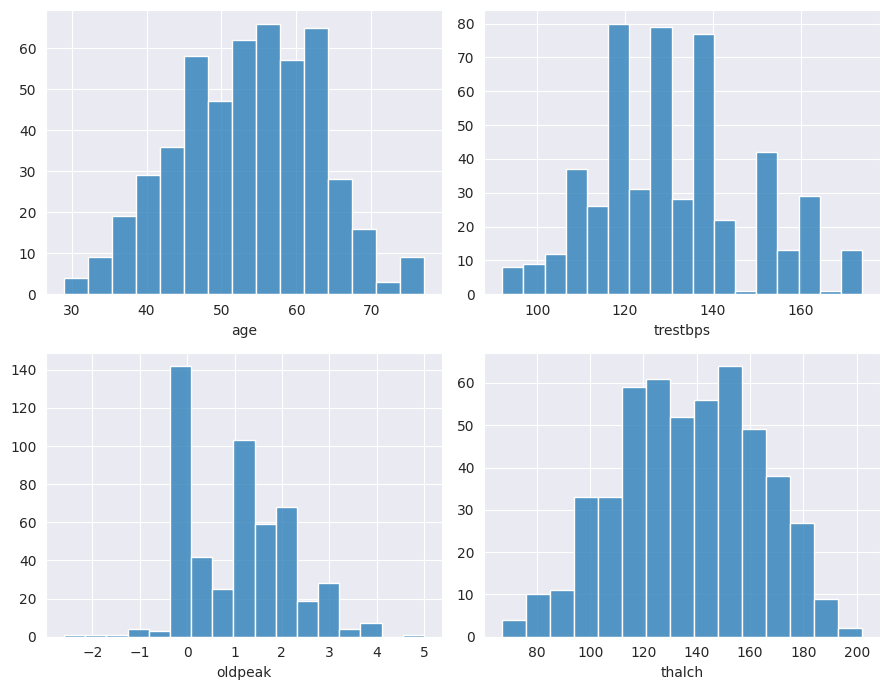

In [132]:
# Histograms are used to visualize the distribution of key numerical features: 'age', 'trestbps', 'oldpeak', and 'thalch'.
# This helps in understanding the frequency and spread of values within these variables.

fig, ax = plt.subplots(2, 2, figsize=(9, 7))

sns.histplot(x= heart_disease_df['age'], ax=ax[0,0])
sns.histplot(x= heart_disease_df['trestbps'], ax=ax[0,1])
sns.histplot(x= heart_disease_df['oldpeak'], ax=ax[1,0])
sns.histplot(x= heart_disease_df['thalch'], ax=ax[1,1])

for axes in ax.flat:
    axes.set_ylabel('')

plt.tight_layout()
plt.show()

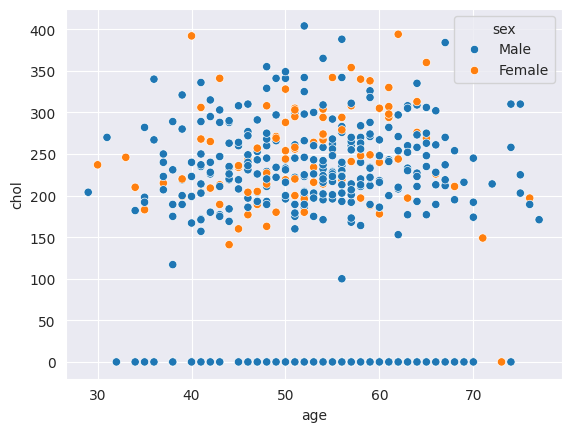

In [133]:
# A scatter plot is used to visualize the relationship between 'age' and 'cholesterol' (chol),
# with different colors representing the 'sex' of the individuals. This helps in identifying potential patterns
# or correlations between these variables and how they differ between genders.

sns.scatterplot(heart_disease_df, x='age', y='chol', hue='sex')
plt.show()

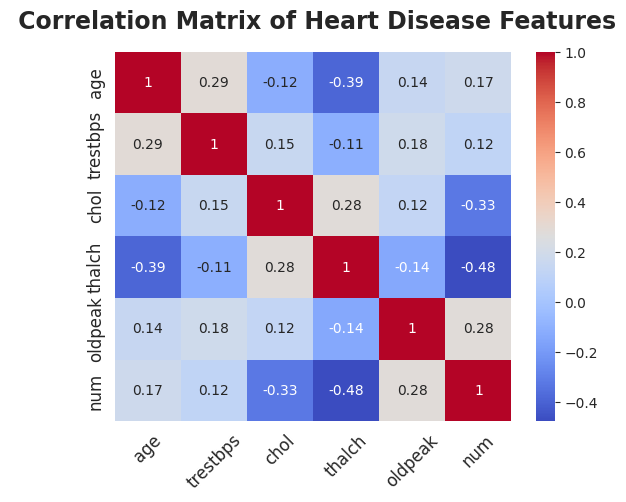

In [134]:
# A heatmap is used to visualize the correlation matrix of numerical features and the target variable 'num'.
# This helps in identifying the strength and direction of linear relationships between variables.

corr = heart_disease_df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title(' Correlation Matrix of Heart Disease Features', y=1.04, fontsize=17, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 2000x1600 with 0 Axes>

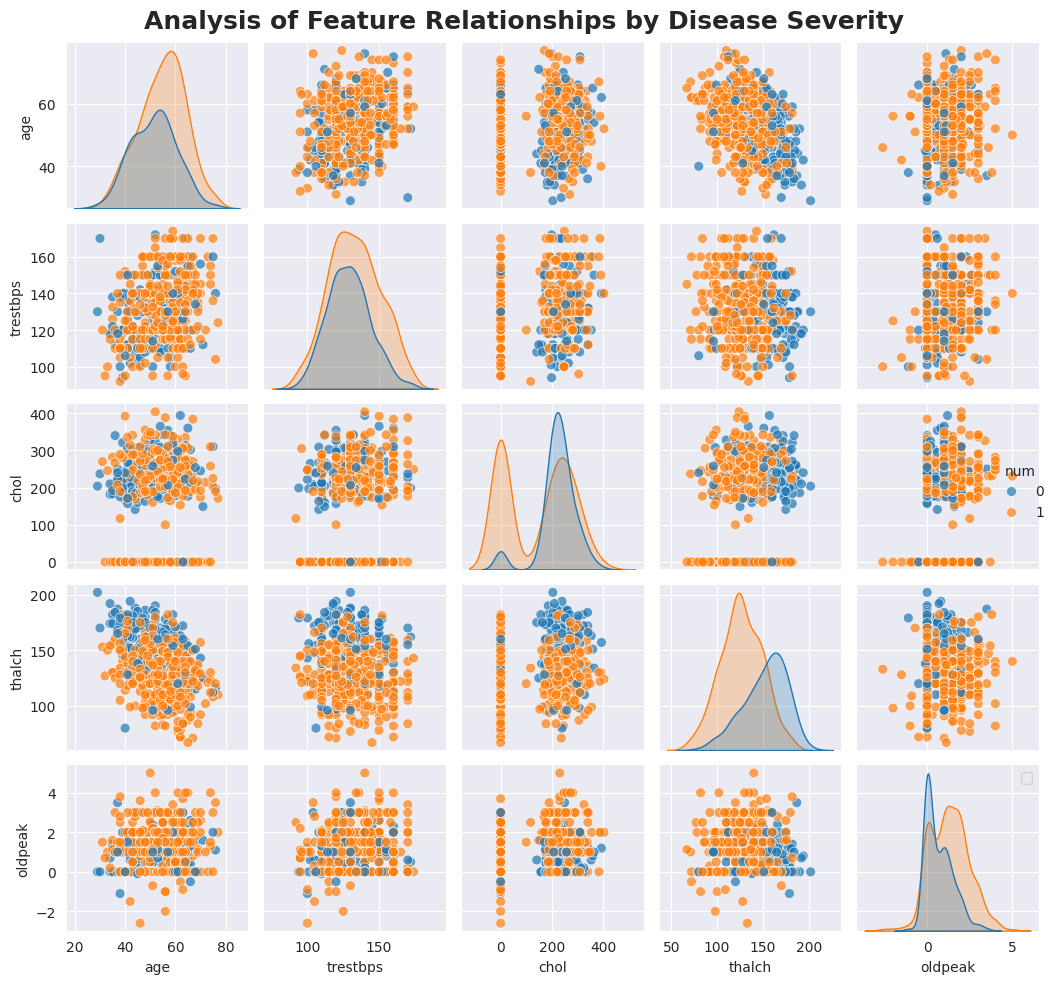

In [135]:
# A pairplot is generated to visualize the pairwise relationships between several features,
# colored by the target variable 'num'. This helps in understanding the distributions
# of individual features and the relationships between pairs of features,
# providing insights into how they relate to the presence or absence of heart disease.

pairplot_data = heart_disease_df.drop(['fbs', 'exang', 'ca'], axis=1)
pairplot_data['num'] = pairplot_data['num'].astype('category')

plt.figure(figsize=(20,16))
sns.pairplot(pairplot_data, hue='num', diag_kind='kde', plot_kws={'alpha':0.7,'s':50}, height=2)
plt.suptitle('Analysis of Feature Relationships by Disease Severity', fontsize=18, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# Data Preprocessing

In [136]:
# This section focuses on transforming the raw data into a format suitable for machine learning models.
# It involves handling categorical variables, scaling numerical features, splitting the data,
# and applying dimensionality reduction.

## Encoding

In [137]:
# Categorical features are converted into numerical representations using one-hot encoding.
# This creates new binary columns for each category within the original categorical features.

heart_disease_df = pd.get_dummies(heart_disease_df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype=int)

## Scaling

In [138]:
# Numerical features are scaled using StandardScaler to standardize their range.
# This is important for algorithms that are sensitive to the scale of the input features,
# such as SVM and Logistic Regression.

heart_disease_df_scaled = heart_disease_df.copy()

scaler = StandardScaler()
scale_clos = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
heart_disease_df_scaled[scale_clos] = scaler.fit_transform(heart_disease_df_scaled[scale_clos])

## Split X & Y

In [139]:
# The dataset is split into features (X) and the target variable (y).
# X contains the independent variables used to predict the outcome,
# and y contains the dependent variable (presence or absence of heart disease).

X = heart_disease_df_scaled.drop('num', axis=1)
y = heart_disease_df_scaled['num']

## Dimension Reduction (PCA)

In [140]:
# Principal Component Analysis (PCA) is applied to reduce the dimensionality of the feature space.
# PCA transforms the original features into a new set of uncorrelated components,
# retaining a specified percentage of the variance in the data.

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
pca.n_components_

np.int64(13)

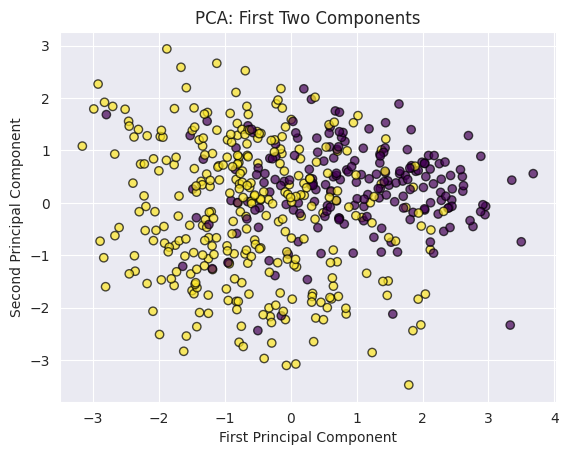

In [141]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=heart_disease_df['num'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Components')
plt.show()

## Data Splitting

In [142]:
# The dataset is split into training and testing sets.
# The training set is used to train the machine learning models,
# and the testing set is used to evaluate their performance on unseen data.
# A stratified split is used to maintain the proportion of the target variable in both sets.

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42, stratify=y)

# Supervised Learning - Classification

In [143]:
# This section focuses on building and evaluating various classification models
# to predict the presence or absence of heart disease based on the processed data.

## Logistic Reg

In [144]:
# Logistic Regression is a linear model for binary classification.
# It estimates the probability of the target variable belonging to a particular class.
# The model is trained on the training data and then used to make predictions on the test data.
#
# Evaluation metrics:
# - accuracy_score: Proportion of correctly classified instances.
# - f1_score: Harmonic mean of precision and recall.
# - balanced_accuracy_score: Average of recall obtained on each class.
# - precision_score: Proportion of true positive predictions among all positive predictions.
# - recall_score: Proportion of true positive predictions among all actual positive instances.
# - classification_report: Provides precision, recall, f1-score, and support for each class.
# - confusion_matrix: A table summarizing the performance of a classification model.
# - roc_curve and auc: Visualize the trade-off between true positive rate and false positive rate, and the area under the curve.

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_pred_prob_log = log_model.predict_proba(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_log))
print('f1_score',f1_score(y_test, y_pred_log))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_log))
print('precision_score',precision_score(y_test, y_pred_log))
print('recall_score',recall_score(y_test, y_pred_log))

print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
cm

accuracy_score 0.8582677165354331
f1_score 0.8875
balanced_accuracy_score 0.8428833071690214
precision_score 0.8658536585365854
recall_score 0.9102564102564102
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.87      0.91      0.89        78

    accuracy                           0.86       127
   macro avg       0.86      0.84      0.85       127
weighted avg       0.86      0.86      0.86       127



array([[38, 11],
       [ 7, 71]])

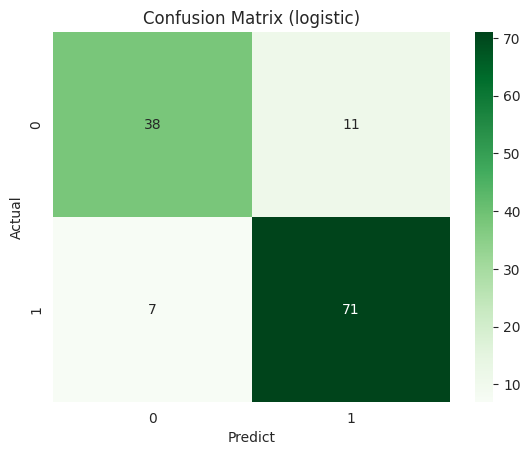

In [145]:
sns.heatmap(cm, cmap='Greens', annot=True)
plt.title('Confusion Matrix (logistic)')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

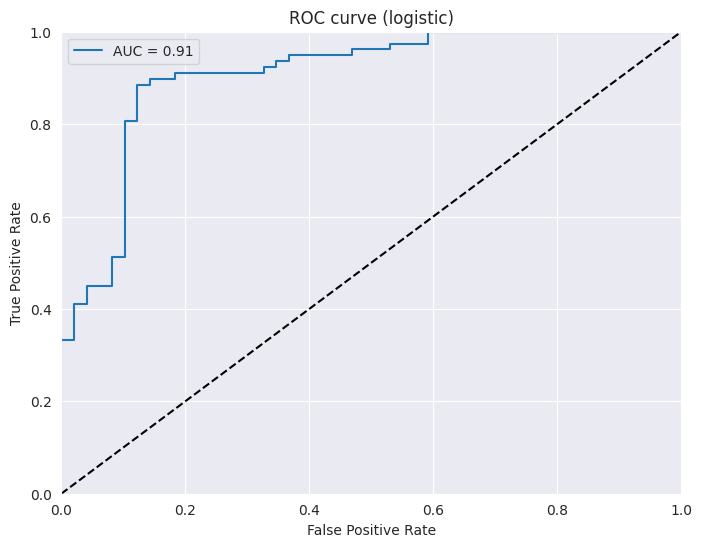

In [146]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_log[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (logistic)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree

In [147]:
# A Decision Tree is a non-linear model that makes decisions based on splitting the data
# according to the values of features.

DT_model = DecisionTreeClassifier(criterion='gini', random_state=42)
DT_model.fit(X_train, y_train)

y_pred_DT = DT_model.predict(X_test)
y_pred_prob_DT = DT_model.predict_proba(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_DT))
print('f1_score',f1_score(y_test, y_pred_DT))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_DT))
print('precision_score',precision_score(y_test, y_pred_DT))
print('recall_score',recall_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))
cm = confusion_matrix(y_test, y_pred_DT)
cm

accuracy_score 0.7637795275590551
f1_score 0.8076923076923077
balanced_accuracy_score 0.750784929356358
precision_score 0.8076923076923077
recall_score 0.8076923076923077
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        49
           1       0.81      0.81      0.81        78

    accuracy                           0.76       127
   macro avg       0.75      0.75      0.75       127
weighted avg       0.76      0.76      0.76       127



array([[34, 15],
       [15, 63]])

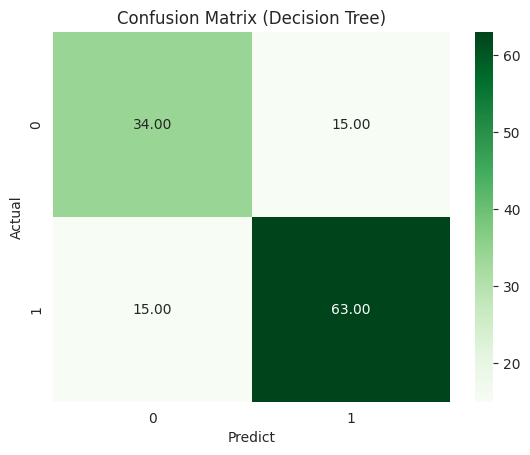

In [ ]:
sns.heatmap(cm, cmap='Greens', annot=True)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

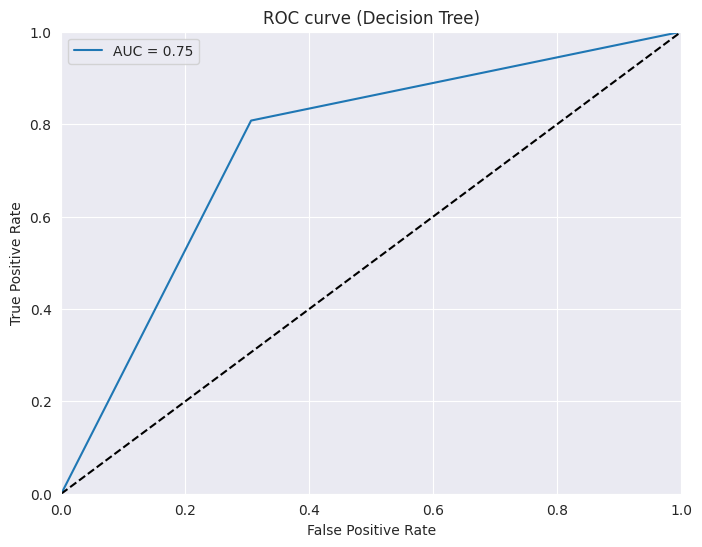

In [149]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_DT[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

In [150]:
# Random Forest is an ensemble method that builds multiple decision trees and combines their predictions.
# It generally improves accuracy and reduces overfitting compared to a single decision tree.

RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)

y_pred_RF = RF_model.predict(X_test)
y_pred_prob_RF = RF_model.predict_proba(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_RF))
print('f1_score',f1_score(y_test, y_pred_RF))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_RF))
print('precision_score',precision_score(y_test, y_pred_RF))
print('recall_score',recall_score(y_test, y_pred_RF))

print(classification_report(y_test, y_pred_RF))
cm = confusion_matrix(y_test, y_pred_RF)
cm

accuracy_score 0.8503937007874016
f1_score 0.8862275449101796
balanced_accuracy_score 0.8212977498691785
precision_score 0.8314606741573034
recall_score 0.9487179487179487
              precision    recall  f1-score   support

           0       0.89      0.69      0.78        49
           1       0.83      0.95      0.89        78

    accuracy                           0.85       127
   macro avg       0.86      0.82      0.83       127
weighted avg       0.86      0.85      0.85       127



array([[34, 15],
       [ 4, 74]])

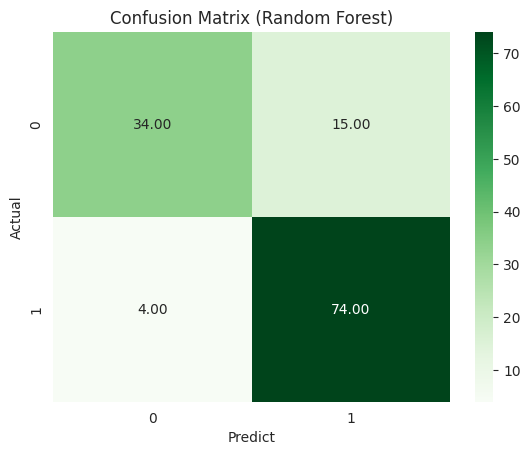

In [ ]:
sns.heatmap(cm, cmap='Greens', annot=True)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

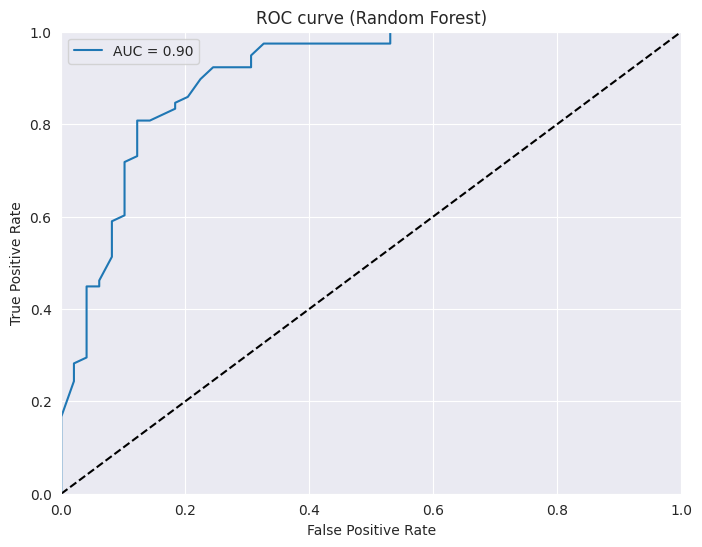

In [152]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_RF[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

## Support Vector Machine (SVM)

In [153]:
# SVM is a model that finds the optimal hyperplane to separate different classes in the feature space.
# Different kernel functions can be used to handle non-linear relationships.

SVM_model = SVC(kernel='linear', degree=5, random_state=42)
SVM_model.fit(X_train, y_train)

y_pred_SVM = SVM_model.predict(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_SVM))
print('f1_score',f1_score(y_test, y_pred_SVM))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_SVM))
print('precision_score',precision_score(y_test, y_pred_SVM))
print('recall_score',recall_score(y_test, y_pred_SVM))

print(classification_report(y_test, y_pred_SVM))
cm = confusion_matrix(y_test, y_pred_SVM)
cm

accuracy_score 0.8582677165354331
f1_score 0.8875
balanced_accuracy_score 0.8428833071690214
precision_score 0.8658536585365854
recall_score 0.9102564102564102
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.87      0.91      0.89        78

    accuracy                           0.86       127
   macro avg       0.86      0.84      0.85       127
weighted avg       0.86      0.86      0.86       127



array([[38, 11],
       [ 7, 71]])

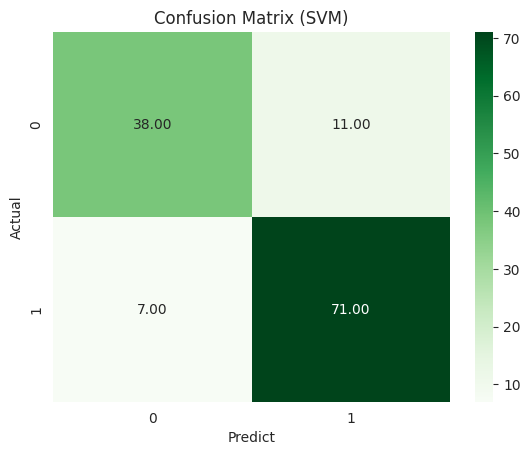

In [ ]:
sns.heatmap(cm, cmap='Greens', annot=True)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

## XGBoost

In [155]:
# XGBoost (Extreme Gradient Boosting) is a powerful gradient boosting algorithm
# known for its performance and speed. It builds trees sequentially, correcting the errors of the previous ones.

xgb_model = XGBClassifier(subsample=0.2, n_estimators=250, max_depth=3, learning_rate=0.01, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_xgb))
print('f1_score',f1_score(y_test, y_pred_xgb))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_xgb))
print('precision_score',precision_score(y_test, y_pred_xgb))
print('recall_score',recall_score(y_test, y_pred_xgb))

print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
cm

accuracy_score 0.8267716535433071
f1_score 0.8705882352941177
balanced_accuracy_score 0.7906855049712193
precision_score 0.8043478260869565
recall_score 0.9487179487179487
              precision    recall  f1-score   support

           0       0.89      0.63      0.74        49
           1       0.80      0.95      0.87        78

    accuracy                           0.83       127
   macro avg       0.85      0.79      0.80       127
weighted avg       0.84      0.83      0.82       127



array([[31, 18],
       [ 4, 74]])

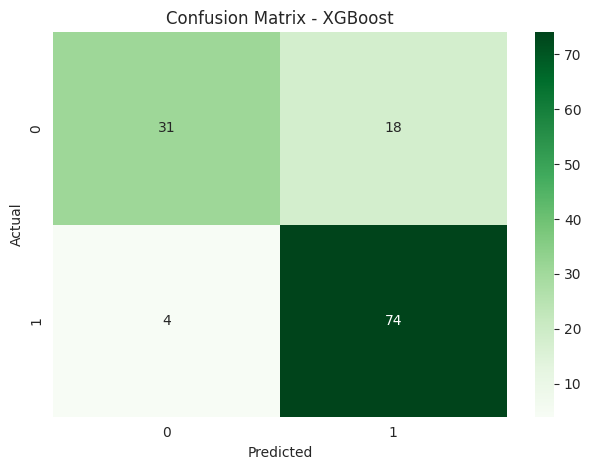

In [156]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')

plt.tight_layout()
plt.show()

## Voting Classifier

In [157]:
# A Voting Classifier is an ensemble method that combines the predictions of multiple individual models.
# It can use either hard voting (majority class) or soft voting (average predicted probabilities).

voting_model = VotingClassifier(estimators=[
    ('log_model', log_model),
    ('RF_model', RF_model),
    ('xgb_model', xgb_model)
], voting='hard')

voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred_voting))
print('f1_score',f1_score(y_test, y_pred_voting))
print('balanced_accuracy_score',balanced_accuracy_score(y_test, y_pred_voting))
print('precision_score',precision_score(y_test, y_pred_voting))
print('recall_score',recall_score(y_test, y_pred_voting))

print(classification_report(y_test, y_pred_voting))
cm = confusion_matrix(y_test, y_pred_voting)
cm

accuracy_score 0.84251968503937
f1_score 0.8795180722891566
balanced_accuracy_score 0.8148874934589221
precision_score 0.8295454545454546
recall_score 0.9358974358974359
              precision    recall  f1-score   support

           0       0.87      0.69      0.77        49
           1       0.83      0.94      0.88        78

    accuracy                           0.84       127
   macro avg       0.85      0.81      0.83       127
weighted avg       0.85      0.84      0.84       127



array([[34, 15],
       [ 5, 73]])

## Hyperparameter Tuning

In [158]:
# Hyperparameter tuning is the process of optimizing model parameters
# that are not learned from data (e.g., number of trees in Random Forest,
# regularization strength in Logistic Regression) to improve performance.

# Two main methods are commonly used:

# 1. GridSearchCV:
#    - Exhaustively tries all combinations in a specified parameter grid.
#    - Guarantees the best result within the grid.
#    - Can be slow with large search spaces.

# 2. RandomizedSearchCV:
#    - Samples a fixed number of parameter combinations from given distributions.
#    - More efficient for large or complex spaces.
#    - Offers a good balance between performance and speed.

# Both methods help identify the optimal hyperparameters for improving
# model accuracy and generalization.

param_grid_log = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

param_grid_DT = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

param_dist_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_dist_SVM = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 5],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

param_dist_voting = {
    'log_model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'log_model__penalty': ['l1', 'l2', 'elasticnet', None],
    'log_model__solver': ['lbfgs', 'liblinear', 'saga'],
    'log_model__max_iter': [100, 500, 1000],

    'RF_model__n_estimators': [100, 200, 300],
    'RF_model__max_depth': [None, 10, 20, 30],
    'RF_model__min_samples_split': [2, 5, 10],
    'RF_model__min_samples_leaf': [1, 2, 4],
    'RF_model__bootstrap': [True, False],

    'xgb_model__n_estimators': [100, 200, 300],
    'xgb_model__max_depth': [3, 5, 7],
    'xgb_model__learning_rate': [0.01, 0.1, 0.2]
}


In [159]:
grid_log = GridSearchCV(log_model, param_grid=param_grid_log, cv=5, scoring='accuracy', n_jobs=-1)
grid_log.fit(X_train, y_train)
print('Best Score log:', grid_log.best_score_)
print('Best Params log:', grid_log.best_params_)

Best Score log: 0.8345522898154478
Best Params log: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [160]:
grid_DT = GridSearchCV(DT_model, param_grid=param_grid_DT, cv=5, scoring='accuracy', n_jobs=-1)
grid_DT.fit(X_train, y_train)
print('Best Score DT:', grid_DT.best_score_)
print('Best Params DT:', grid_DT.best_params_)

Best Score DT: 0.8004442925495556
Best Params DT: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20, 'splitter': 'random'}


In [161]:
grid_RF = RandomizedSearchCV(RF_model, param_distributions=param_dist_RF, cv=3, scoring='accuracy', n_jobs=-1)
grid_RF.fit(X_train, y_train)
print('Best Score RF:', grid_RF.best_score_)
print('Best Params RF:', grid_RF.best_params_)

Best Score RF: 0.8241469816272966
Best Params RF: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


In [162]:
grid_SVM = RandomizedSearchCV(SVM_model, param_distributions=param_dist_SVM, cv=5, scoring='accuracy', n_jobs=-1)
grid_SVM.fit(X_train, y_train)
print('Best Score SVM:', grid_SVM.best_score_)
print('Best Params SVM:', grid_SVM.best_params_)

Best Score SVM: 0.8240601503759398
Best Params SVM: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, 'C': 1}


In [163]:
grid_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print('Best Score xgb:', grid_xgb.best_score_)
print('Best Params xgb:', grid_xgb.best_params_)

Best Score xgb: 0.8293963254593176
Best Params xgb: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


In [164]:
grid_voting = RandomizedSearchCV(voting_model, param_distributions=param_dist_voting, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1)
grid_voting.fit(X_train, y_train)
print('Best Score voting:', grid_voting.best_score_)
print('Best Params voting:', grid_voting.best_params_)

Best Score voting: 0.8136482939632547
Best Params voting: {'xgb_model__n_estimators': 300, 'xgb_model__max_depth': 3, 'xgb_model__learning_rate': 0.1, 'log_model__solver': 'lbfgs', 'log_model__penalty': None, 'log_model__max_iter': 1000, 'log_model__C': 100, 'RF_model__n_estimators': 300, 'RF_model__min_samples_split': 2, 'RF_model__min_samples_leaf': 4, 'RF_model__max_depth': None, 'RF_model__bootstrap': True}


## Evaluation Models

Final Model Evaluation:
                              Accuracy  F1-Score
Model                                           
Logistic Regression              85.83     88.75
Support Vector Machine (SVM)     85.83     88.75
Random Forest                    85.04     88.62
Voting Classifier                84.25     87.95
XGBoost                          82.68     87.06
Decision Tree                    76.38     80.77


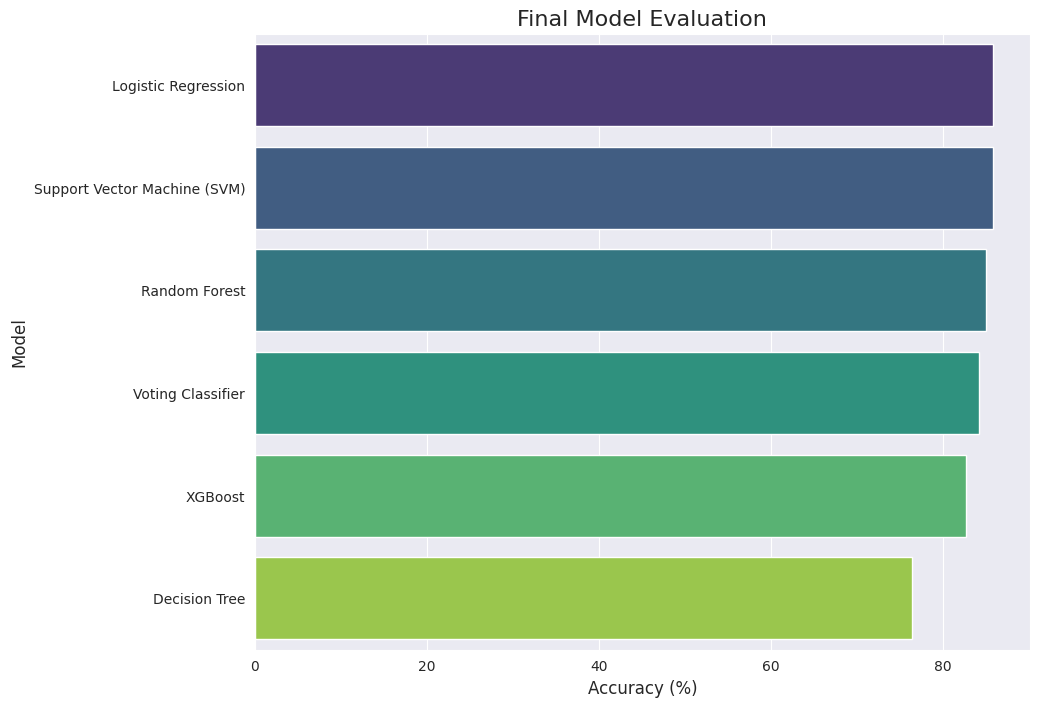

In [165]:
# This section summarizes and compares the performance of all trained classification models.

# Models are evaluated using key metrics to assess their effectiveness in predicting heart disease:
# - Accuracy: Proportion of correctly predicted instances.
# - F1-Score: Harmonic mean of precision and recall, useful for imbalanced data.

# Results are:
# - Presented in a table sorted by accuracy.
# - Visualized using a bar plot to clearly compare model performance.

all_models = {
    'Model': [
        'Logistic Regression', 'Decision Tree', 'Random Forest',
        'Support Vector Machine (SVM)', 'XGBoost', 'Voting Classifier'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_DT),
        accuracy_score(y_test, y_pred_RF), accuracy_score(y_test, y_pred_SVM),
        accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_voting)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_DT),
        f1_score(y_test, y_pred_RF), f1_score(y_test, y_pred_SVM),
        f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_voting)
    ]
}

performance_df = pd.DataFrame(all_models).set_index('Model').sort_values(by='Accuracy', ascending=False)

print('Final Model Evaluation:')
print((performance_df * 100).round(2))

plt.figure(figsize=(10, 8))
sns.barplot(x=performance_df['Accuracy'] * 100, y=performance_df.index, palette='viridis')
plt.title('Final Model Evaluation', fontsize=16)
plt.xlabel("Accuracy (%)", fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.show()

# Unsupervised Learning - Clustering

In [166]:
# This section explores unsupervised learning techniques to find patterns or groupings in the data
# without using the target variable (heart disease presence).

## KMeans

In [167]:
# K-Means is a popular partitioning clustering algorithm that aims to partition data into k clusters.
# It works by iteratively assigning data points to the nearest centroid and updating the centroids based on the mean of the points in each cluster.
#
# The optimal number of clusters for K-Means is often determined using methods like:
# - Silhouette Score: Measures how similar a data point is to its own cluster compared to other clusters. Higher silhouette scores indicate better-defined clusters.
# - Elbow Method: Plots the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow point" in the plot, where the rate of decrease in WCSS changes significantly, is considered an indicator of the optimal number of clusters.

kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_pca)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Silhouette Score:", silhouette_score(X, labels))

Silhouette Score: 0.15522638381791395


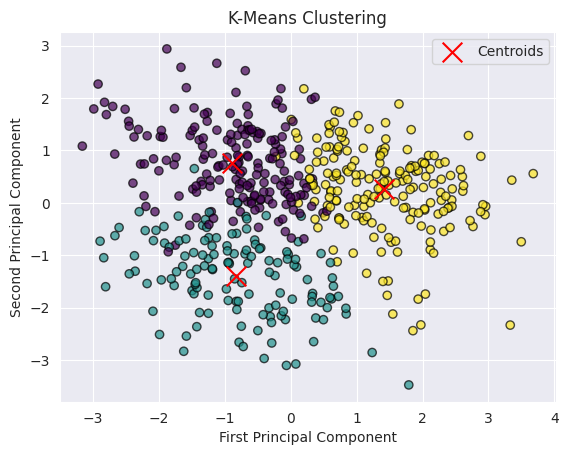

In [168]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

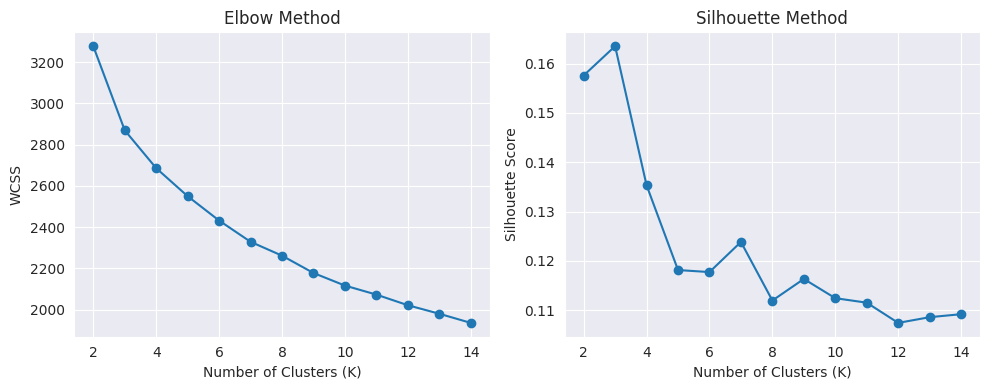

In [169]:
wcss = []
silhouette_scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(2, 15), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

## Hierarchical Clustering

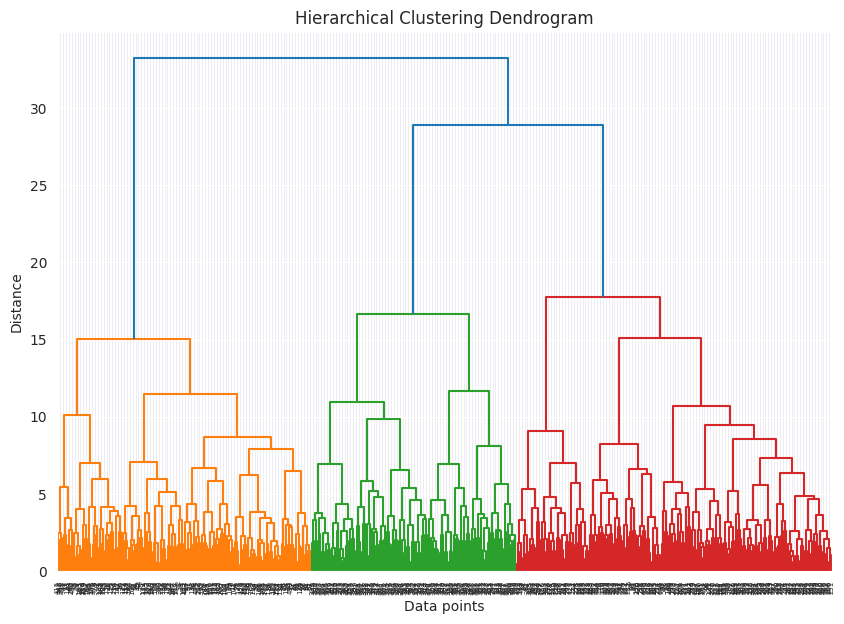

In [170]:
# Hierarchical Clustering is a method that builds a hierarchy of clusters.
# It can be either agglomerative (bottom-up, starting with individual points and merging them) or divisive (top-down, starting with one cluster and splitting it).
# The clustering process and the relationships between clusters are visualized using a **dendrogram**.
# The dendrogram helps in determining the optimal number of clusters by examining the distances at which clusters are merged.

linkage_data = linkage(X_pca, method= 'ward', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(linkage_data)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# # Conclusion and Future Work
#
# This analysis explored heart disease prediction and clustering using the provided dataset.
#
# ## Key Findings:
#
# - **EDA:** Initial exploration revealed missing values and outliers in several features, which were addressed through imputation and removal. Visualizations provided insights into the distributions of numerical features and relationships between variables, highlighting potential correlations with the target variable ('num').
# - **Classification Models:** Several classification models were trained and evaluated. The Logistic Regression and Support Vector Machine (SVM) models achieved the highest accuracy and F1-score on the test set. The Voting Classifier, combining the predictions of the individual models, also showed strong performance. Hyperparameter tuning using GridSearchCV and RandomizedSearchCV helped optimize the models' performance.
# - **Clustering Analysis:** K-Means clustering was applied to the data after PCA. The Silhouette and Elbow methods suggested that a small number of clusters (around 2 or 3) might be present, although the Silhouette score was relatively low, indicating that the clusters are not very well-separated. Hierarchical clustering with a dendrogram provided another view of potential groupings in the data.
#
# ## Potential Next Steps:
#
# - **Explore Other Models:** Investigate other classification algorithms such as K-Nearest Neighbors, Naive Bayes, or ensemble methods like Gradient Boosting Machines (beyond XGBoost) and AdaBoost.
# - **Feature Engineering:** Create new features from existing ones that could potentially improve model performance. This might involve interactions between features or polynomial features.
# - **More In-depth Clustering Analysis:** Explore different clustering algorithms (e.g., DBSCAN, Gaussian Mixture Models) and evaluation metrics to potentially identify more meaningful clusters. Analyze the characteristics of the identified clusters to gain further insights into patient subgroups.
# - **Advanced Hyperparameter Tuning:** Conduct more extensive hyperparameter tuning with a wider range of parameters and more folds in cross-validation for the best-performing models.
# - **Address Class Imbalance:** While the current dataset split was stratified, for datasets with significant class imbalance, consider techniques like oversampling (SMOTE) or undersampling to improve model performance for the minority class.
# - **Interpretability:** For the best-performing classification models, explore methods for model interpretability (e.g., feature importance for tree-based models, coefficients for linear models) to understand which features are most influential in predicting heart disease.

## Summary:

### Data Analysis Key Findings

*   Initial exploratory data analysis revealed missing values and outliers in several features, which were handled through imputation and removal. Visualizations provided insights into feature distributions and relationships.
*   Among the classification models evaluated, Logistic Regression and Support Vector Machine (SVM) demonstrated the highest accuracy and F1-score on the test set.
*   K-Means clustering applied after PCA suggested a potential presence of a small number of clusters (2 or 3), though a relatively low Silhouette score indicated that the clusters were not distinctly separated.

### Insights or Next Steps

*   Further exploration of different classification algorithms and feature engineering techniques could potentially improve the prediction accuracy.
*   A more in-depth clustering analysis using alternative algorithms and evaluation metrics could help identify more meaningful groupings within the patient data.
